# Econometrics 2018 Fall, HW2
### 2018321078 정유진
<br>

## 0. 필요한 라이브러리 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.display import display, Math, Latex
import statsmodels.api as sm
from sklearn import linear_model

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
## 1. 데이터 불러오기, 데이터 프레임으로 형식 변경

with open('mroz_data_workers.txt', 'r') as f:
    x = f.readlines()

In [3]:
col_names = x[0].split(' ')
df = pd.DataFrame(columns = col_names)

In [4]:
only_d = x[1:]

In [5]:
for i in range(len(only_d)):
    only_d[i] = only_d[i].split()

In [6]:
data = pd.DataFrame(only_d,columns = col_names)

In [77]:
data.rename(columns={'AX\n': 'AX'}, inplace=True)

In [78]:
data.columns

Index(['LFP', 'WHRS', 'KL6', 'K618', 'WA', 'WE', 'WW', 'RPWG', 'HHRS', 'HA',
       'HE', 'HW', 'FAMINC', 'MTR', 'WMED', 'WFED', 'UN', 'CIT', 'AX'],
      dtype='object')

In [8]:
data.head() # 428 rows × 19 columns

,LFP,WHRS,KL6,K618,WA,WE,WW,RPWG,HHRS,HA,HE,HW,FAMINC,MTR,WMED,WFED,UN,CIT,AX
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,12,4.0288,16310,.7215,12,7,5.0,0,14
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,9,8.4416,21800,.6615,7,7,11.0,1,5
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,12,3.5807,21040,.6915,12,7,5.0,0,15
3,1,456,0,3,34,12,1.0965,3.25,1920,53,10,3.5417,7300,.7815,7,7,5.0,0,6
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,12,10.0000,27300,.6215,12,14,9.5,1,7


In [9]:
data.sample(5)

,LFP,WHRS,KL6,K618,WA,WE,WW,RPWG,HHRS,HA,HE,HW,FAMINC,MTR,WMED,WFED,UN,CIT,AX
377,1,352,0,2,34,16,3.4091,0.00,3300,33,12,3.3424,18400,.6915,12,12,14.0,0,8
7,1,1020,0,0,54,12,7.8431,9.98,4120,53,8,2.5485,18900,.6915,3,3,5.0,0,35
107,1,1176,0,3,47,12,3.2313,3.35,2301,48,13,5.4759,24686,.7215,7,7,9.5,0,26
340,1,1500,0,1,47,16,1.6667,1.50,2342,49,17,11.5290,31100,.5815,14,14,11.0,1,8
310,1,2419,0,1,30,10,3.3072,3.90,2025,34,12,7.6993,23591,.6615,7,7,11.0,1,10


## 2. 분석에 사용할 13개 변수 및 타겟 칼럼 골라내기

In [10]:
col_need = ['LFP','KL6','K618','WA','WE','WW','WMED','WFED','AX\n','HHRS','HA','HE','HW']

In [11]:
len(col_need)

13

In [12]:
d2 = data[col_need]

In [13]:
d2.shape

(428, 13)

In [14]:
X = d2 # X variable

In [15]:
target = data['WHRS'] #Series
#y = target # y 

## 3. 숙제에 제시된 회귀모형 만들기

$$\forall i = 1,2, \cdots , 428$$
$$WHRS_i = \beta_1 + \beta_2KL6_i + \beta_3K618_i + \beta_4WA_i + \beta_5WE_i
+ \beta_6WW_i + \beta_7WMED_i + \beta_8WFED_i +\beta_9AX_i + \beta_10HHRS_i + \beta_{11} HA_i
+ \beta_{12} HE_i + \beta_{13} HW_i + u_i$$

In [55]:
y = np.asarray(data['WHRS']).reshape(-1,)

In [56]:
y = list(y)

In [57]:
clf = linear_model.LinearRegression()

In [58]:
clf.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
clf.coef_ # Sklearn library 이용

array([ 0.00000000e+00, -3.20915826e+02, -7.61587201e+01, -1.67975979e+01,
        1.70945953e+00, -2.40304731e+01,  3.33657618e+00, -4.46645039e+00,
        3.00897581e+01, -1.29891434e-02, -3.43151316e+00, -8.06763260e+00,
       -6.94681095e+00])

In [60]:
clf.intercept_

2184.6894400706806

In [61]:
data = data.convert_objects(convert_numeric=True)
y = np.asarray(data['WHRS'])
#print(y.shape)
X = np.asarray(data[['LFP','KL6','K618','WA','WE','WW','WMED','WFED','AX\n','HHRS','HA','HE','HW']]) 
#print(X.shape)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
#model.summary()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


# =============20 Nov 2018===============
# HW 2

In [91]:
# X and y and model.
%matplotlib inline

from __future__ import print_function
from statsmodels.compat import lzip
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     6.086
Date:                Tue, 20 Nov 2018   Prob (F-statistic):           7.35e-10
Time:                        10:26:03   Log-Likelihood:                -3420.2
No. Observations:                 428   AIC:                             6866.
Df Residuals:                     415   BIC:                             6919.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2184.6894    373.914      5.843      0.000    1449.688    2919.691
x1          -320.9158     97.621     -3.287      0.001    -512.809    -129.022
x2           -76.1587     30.515     -2.496      0.013    -136.142     -16.175
x3           -16.7976     10.826     -1.552      0.122     -38.077       4.482
x4             1.7095     21.599      0.079      0.937     -40.747      44.166
x5           -24.0305     11.497     -2.090      0.037     -46.630      -1.431
x6             3.3366     13.418      0.249      0.804     -23.040      29.713
x7            -4.4665     12.620     -0.354      0.724     -29.274      20.341
x8            30.0898      5.298      5.680      0.000      19.676      40.504
x9            -0.0130      0.067     -0.194      0.846      -0.145       0.119
x10           -3.4315     10.084     -0.340      0.734     -23.253      16.390
x11           -8.0676     15.673     -0.515      0.607     -38.875      22.740
x12           -6.9468     12.091     -0.575      0.566     -30.713      16.820
==============================================================================
Omnibus:                       25.604   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.000
Skew:                           0.448   Prob(JB):                     5.60e-09
Kurtosis:                       4.152   Cond. No.                     2.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

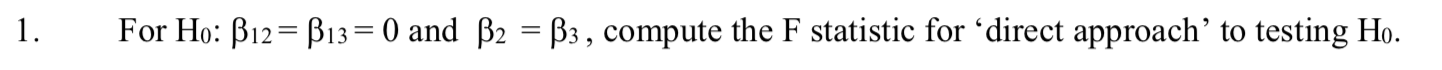

In [85]:
from statsmodels.formula.api import ols
#y = np.asarray(data['WHRS'])
#print(y.shape)
#X = np.asarray(data[['LFP','KL6','K618','WA','WE','WW','WMED','WFED','AX\n','HHRS','HA','HE','HW']]) 
#print(X.shape)
#LFP+KL6+K618+WA+WE+WW+WMED+WFED+AX\n+HHRS+HA+HE+HW
formula = 'WHRS ~  LFP+KL6+K618+WA+WE+WW+WMED+WFED+AX+HHRS+HA+HE+HW'
results = ols(formula, data).fit()
hypotheses = '(KL6 = K618 = 0), (HE=HW=0)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[4.32070266]]), p=0.001956227438917814, df_denom=415, df_num=4>


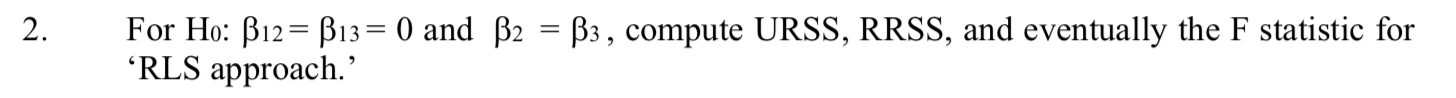

In [90]:
f_test.summary()

'<F test: F=array([[4.32070266]]), p=0.001956227438917814, df_denom=415, df_num=4>'

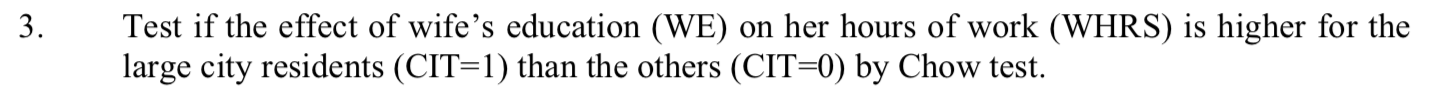

In [86]:
data.columns

Index(['LFP', 'WHRS', 'KL6', 'K618', 'WA', 'WE', 'WW', 'RPWG', 'HHRS', 'HA',
       'HE', 'HW', 'FAMINC', 'MTR', 'WMED', 'WFED', 'UN', 'CIT', 'AX'],
      dtype='object')

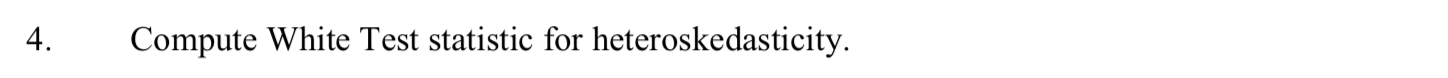

In [35]:
from statsmodels.stats.diagnostic import het_white

In [49]:
w_test = het_white(model.resid, model.model.exog)
w_test

(118.12002160360105,
 0.025057811277727604,
 1.4273069882090883,
 0.013188852332922201)

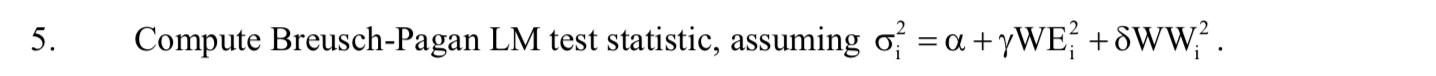

In [40]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breushpagan(model.resid, model.model.exog)
lzip(name, test)
# http://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  This is separate from the ipykernel package so we can avoid doing imports until


[('Lagrange multiplier statistic', 19.440969956748685),
 ('p-value', 0.07842780619019578),
 ('f-value', 1.6456215501255318),
 ('f p-value', 0.07666654515885596)]

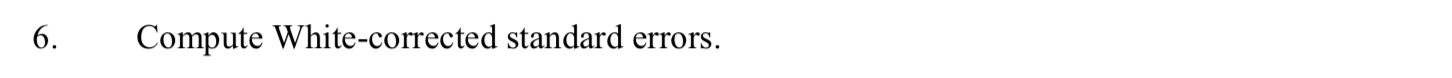

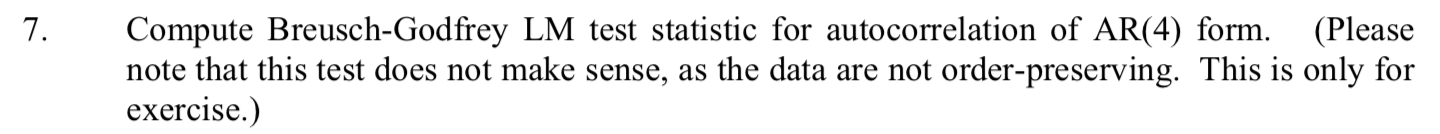

In [41]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

In [42]:
bg_test = acorr_breusch_godfrey(model)

In [46]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
lzip(name, bg_test)

[('Lagrange multiplier statistic', 21.91223673681315),
 ('p-value', 0.18811780134713663),
 ('f-value', 1.2632838934606196),
 ('f p-value', 0.2128438472793056)]

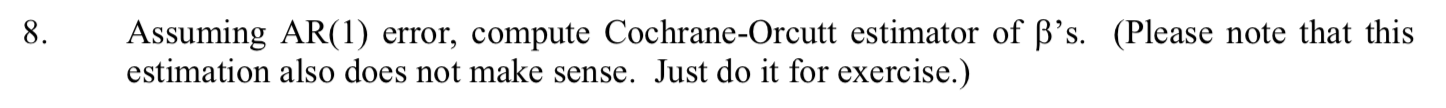